<a href="https://colab.research.google.com/github/sanujsriv/_topic_models/blob/FoTo/FoTo_20news_Local_v2_Feb15_twocenters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# # #@title
# # !wget https://www.dropbox.com/s/9v5ar9xu2dv4e04/data_twentynews_preprocessed.pkl
# !wget https://www.dropbox.com/s/09y9y1h0xk3cxaj/embeddings_twentynews.pkl
# !wget https://www.dropbox.com/s/ewv3vcwgll0r8a7/data_twentynews_labels.pkl
# !wget https://www.dropbox.com/s/chpjn9lzr7rmn2k/fixed_data_twentynews_preprocessed.pkl

In [ ]:
!wget https://www.dropbox.com/s/8khmuj31il8zgkp/data_reuters_labels.pkl
!wget https://www.dropbox.com/s/bgc1ht0jsyjed6s/embeddings_reuters.pkl
!wget https://www.dropbox.com/s/9fk30bjzeefvhgl/data_reuters_preprocessed.pkl

--2021-02-16 00:03:49--  https://www.dropbox.com/s/8khmuj31il8zgkp/data_reuters_labels.pkl
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/8khmuj31il8zgkp/data_reuters_labels.pkl [following]
--2021-02-16 00:03:49--  https://www.dropbox.com/s/raw/8khmuj31il8zgkp/data_reuters_labels.pkl
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca4b9954f426074ced9d77f821f.dl.dropboxusercontent.com/cd/0/inline/BJDCmhHV2tNjHREuhUsDWsCx_ps6B3zVsePuw-GzuitUtkBGppo0IMMIRZRNfBxc_KFBBgRa6ZjgyzbYXkguqDtLcK3tOHFIAmMSLfYHK3_EIGE_y3PC8hBF4OXCd4iaBOg/file# [following]
--2021-02-16 00:03:50--  https://uca4b9954f426074ced9d77f821f.dl.dropboxusercontent.com/cd/0/inline/BJDCmhHV2tNjHREuhUsDWsCx_ps6B3zVsePuw-GzuitUtkBGppo0IMMIRZRNfBxc_KFBBgRa6Zjgyz

In [ ]:
#@title
import os
os.chdir("C:/Users/sanuj/Documents/FoTo/")
!dir

In [ ]:
#@title Stopwords
import nltk
nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')

In [ ]:
#@title Imports
# from sympy.stats import RaisedCosine, density
import torch
import pandas as pd
from torch import nn
import re
from time import time
import numpy as np
import collections
import torch.optim as optim
# from utils import get_topwords, plot_fig
# from plsv_vae import PlsvVAE
# import data_preprocessing
from sklearn.feature_extraction.text import CountVectorizer
# from nltk.corpus import stopwords

In [ ]:
#@title function : load / save pickle_obj
import pickle

def save_obj(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [ ]:
#@title preprocessing non-stem
import sklearn
import pickle
import re
import string
from numpy import random
# from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.datasets import fetch_20newsgroups
from sklearn.datasets import fetch_rcv1
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# stem = PorterStemmer()
wnl = WordNetLemmatizer()
vectorizer = CountVectorizer(min_df=5)
vectorizer_tfidf = TfidfVectorizer(min_df=5)
stop_words = set(stopwords.words('english'))

stopwords = ['would' ,'know' ,'dont' ,'get', 'like', 'think' ,'im' ,"also","said","a", "able", "about", "above", "abst", "accordance", "according", "accordingly", "across", "act", "actually", "added", "adj", "affected", "affecting", "affects", "after", "afterwards", "again", "against", "ah", "all", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "apparently", "approximately", "are", "aren", "arent", "arise", "around", "as", "aside", "ask", "asking", "at", "auth", "available", "away", "awfully", "b", "back", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "between", "beyond", "biol", "both", "brief", "briefly", "but", "by", "c", "ca", "came", "can", "cannot", "can't", "cause", "causes", "certain", "certainly", "co", "com", "come", "comes", "contain", "containing", "contains", "could", "couldnt", "d", "date", "did", "didn't", "different", "do", "does", "doesn't", "doing", "done", "don't", "down", "downwards", "due", "during", "e", "each", "ed", "edu", "effect", "eg", "eight", "eighty", "either", "else", "elsewhere", "end", "ending", "enough", "especially", "et", "et-al", "etc", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "except", "f", "far", "few", "ff", "fifth", "first", "five", "fix", "followed", "following", "follows", "for", "former", "formerly", "forth", "found", "four", "from", "further", "furthermore", "g", "gave", "get", "gets", "getting", "give", "given", "gives", "giving", "go", "goes", "gone", "got", "gotten", "h", "had", "happens", "hardly", "has", "hasn't", "have", "haven't", "having", "he", "hed", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "hereupon", "hers", "herself", "hes", "hi", "hid", "him", "himself", "his", "hither", "home", "how", "howbeit", "however", "hundred", "i", "id", "ie", "if", "i'll", "im", "immediate", "immediately", "importance", "important", "in", "inc", "indeed", "index", "information", "instead", "into", "invention", "inward", "is", "isn't", "it", "itd", "it'll", "its", "itself", "i've", "j", "just", "k", "keep	keeps", "kept", "kg", "km", "know", "known", "knows", "l", "largely", "last", "lately", "later", "latter", "latterly", "least", "less", "lest", "let", "lets", "like", "liked", "likely", "line", "little", "'ll", "look", "looking", "looks", "ltd", "m", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "million", "miss", "ml", "more", "moreover", "most", "mostly", "mr", "mrs", "much", "mug", "must", "my", "myself", "n", "na", "name", "namely", "nay", "nd", "near", "nearly", "necessarily", "necessary", "need", "needs", "neither", "never", "nevertheless", "new", "next", "nine", "ninety", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "now", "nowhere", "o", "obtain", "obtained", "obviously", "of", "off", "often", "oh", "ok", "okay", "old", "omitted", "on", "once", "one", "ones", "only", "onto", "or", "ord", "other", "others", "otherwise", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "owing", "own", "p", "page", "pages", "part", "particular", "particularly", "past", "per", "perhaps", "placed", "please", "plus", "poorly", "possible", "possibly", "potentially", "pp", "predominantly", "present", "previously", "primarily", "probably", "promptly", "proud", "provides", "put", "q", "que", "quickly", "quite", "qv", "r", "ran", "rather", "rd", "re", "readily", "really", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "respectively", "resulted", "resulting", "results", "right", "run", "s", "said", "same", "saw", "say", "saying", "says", "sec", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sent", "seven", "several", "shall", "she", "shed", "she'll", "shes", "should", "shouldn't", "show", "showed", "shown", "showns", "shows", "significant", "significantly", "similar", "similarly", "since", "six", "slightly", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "specifically", "specified", "specify", "specifying", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure	t", "take", "taken", "taking", "tell", "tends", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'll", "theyre", "they've", "think", "this", "those", "thou", "though", "thoughh", "thousand", "throug", "through", "throughout", "thru", "thus", "til", "tip", "to", "together", "too", "took", "toward", "towards", "tried", "tries", "truly", "try", "trying", "ts", "twice", "two", "u", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "up", "upon", "ups", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "v", "value", "various", "'ve", "very", "via", "viz", "vol", "vols", "vs", "w", "want", "wants", "was", "wasnt", "way", "we", "wed", "welcome", "we'll", "went", "were", "werent", "we've", "what", "whatever", "what'll", "whats", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "whose", "why", "widely", "willing", "wish", "with", "within", "without", "wont", "words", "world", "would", "wouldnt", "www", "x", "y", "yes", "yet", "you", "youd", "you'll", "your", "youre", "yours", "yourself", "yourselves", "you've", "z", "zero"]

def preprocessing_nonstem(doc, word2vec_model):
    # word_vectors = word2vec_model.wv
    doc = doc.lower()
    doc = doc.translate(str.maketrans('', '', string.punctuation))
    doc = word_tokenize(doc)
    doc = filter(lambda x:x not in string.punctuation, doc)
    doc = filter(lambda x:x not in stop_words, doc)
    doc = filter(lambda x:not x.isdigit(), doc)

    doc = [wnl.lemmatize(w.lower()) for w in doc]
    doc = filter(lambda x: x in word2vec_model.vocab,doc)
    doc = ' '.join(e for e in doc)
    return doc

In [ ]:
## 20 News ##
embeddings = load_obj('embeddings_twentynews')
data_20news_preprocessed = load_obj('fixed_data_twentynews_preprocessed')
# data_20news_preprocessed_labels = load_obj("data_20news_preprocessed_labels")
data_20news_preprocessed_labels = load_obj("data_twentynews_labels")

In [ ]:
## 20 News ##
embeddings = load_obj('embeddings_reuters')
data_20news_preprocessed = load_obj('data_reuters_preprocessed')
# data_20news_preprocessed_labels = load_obj("data_20news_preprocessed_labels")
data_20news_preprocessed_labels = load_obj("data_reuters_labels")

In [ ]:
len(data_20news_preprocessed),len(data_20news_preprocessed_labels)

(7674, 7674)

In [ ]:
# def cosine_similarity_desm_docs(query_list, doc, embeddings):
#   doc_bar = torch.zeros(300)
#   #doc_bar_list=[]
#   sim_list = torch.zeros(len(doc))
#   index = 0
#   for d in doc:
#     doc_bar = torch.zeros(300)
#     words = d.split()
#     for word in words:
#       doc_bar.add_(torch.from_numpy(embeddings[word])/torch.norm(torch.from_numpy(embeddings[word])))
#     doc_bar = doc_bar / len(words)

#     sum = 0
#     for q in query_list:
#       sum += torch.dot(torch.from_numpy(embeddings[q]) , doc_bar)/(torch.norm(torch.from_numpy(embeddings[q]))*torch.norm(doc_bar))
#     sum = sum/len(query_list)
#     sim_list[index]=sum
#     index = index + 1
#   return sim_list

In [ ]:
def cosine_similarity_desm_docs(query_list, train_vec, vocab, embeddings):
  num_docs = len(train_vec)
  num_voc = len(vocab)
  sim_list = torch.zeros(num_docs)
  index = 0
  id_vocab = dict(map(reversed, vocab.items()))
  for d in range(num_docs):
    if(d%5000==0): print(d)
    doc_bar = torch.zeros(300)
    doc_length = 0
    for v in range(num_voc):
      # print(type(train_vec[d][v]))
      if(train_vec[d][v] > 0):
        doc_bar.add_(train_vec[d][v] * torch.from_numpy(embeddings[id_vocab[v]])/torch.norm(torch.from_numpy(embeddings[id_vocab[v]])))
        doc_length = doc_length + train_vec[d][v]
    doc_bar = doc_bar / doc_length
    sum = 0

    for q in query_list:
      sum += torch.dot(torch.from_numpy(embeddings[q]) , doc_bar)/(torch.norm(torch.from_numpy(embeddings[q]))*torch.norm(doc_bar))
    sum = sum/len(query_list)
    sim_list[index]=sum
    index = index + 1

  return sim_list

In [ ]:
preprossed_data = data_20news_preprocessed
train_label = data_20news_preprocessed_labels
vectorizer = CountVectorizer(min_df=10)
train_vec = vectorizer.fit_transform(preprossed_data).toarray()
vocab = vectorizer.vocabulary_
nonzeros_indexes = np.where(train_vec.any(1))[0]
train_vec_non_zeros = [train_vec[i] for i in nonzeros_indexes]
preprossed_data_non_zeros = [preprossed_data[i] for i in nonzeros_indexes]
train_label = [data_20news_preprocessed_labels[i] for i in nonzeros_indexes]

#keywords = ['illness','disease','fatal','diagnosis']
train_vec = np.array(train_vec_non_zeros)

# keywords = ['baseball','game','sport','win']
# keywords  = ['sport', 'baseball', 'game','match']
# keywords = ['oil','crude','ship']
keywords =['stock']
all_rscores = cosine_similarity_desm_docs(keywords,train_vec,vocab, embeddings)
print(train_vec)
print(train_label)
print(vocab)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

tensor_train_w = torch.from_numpy(np.array(train_vec)).float()
train_label = np.asarray(train_label)

id_vocab = dict(map(reversed, vocab.items()))

num_coordinate = 2
bs = 256
en1_units_x = 100
en2_units_x = 100
num_input = train_vec[0].shape[0]
variance_x = 1
learning_rate = 0.002
beta1 = 0.99
beta2 = 0.999
drop_rate = 0.6
num_topic = 20

0
5000
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['earn', 'acq', 'earn', 'earn', 'earn', 'earn', 'earn', 'earn', 'earn', 'earn', 'earn', 'earn', 'earn', 'earn', 'acq', 'trade', 'ship', 'earn', 'earn', 'earn', 'ship', 'earn', 'earn', 'earn', 'acq', 'earn', 'earn', 'earn', 'earn', 'earn', 'earn', 'earn', 'earn', 'earn', 'acq', 'earn', 'earn', 'acq', 'earn', 'earn', 'grain', 'acq', 'earn', 'crude', 'acq', 'earn', 'earn', 'acq', 'acq', 'grain', 'earn', 'earn', 'earn', 'earn', 'earn', 'crude', 'earn', 'earn', 'earn', 'earn', 'earn', 'acq', 'acq', 'earn', 'acq', 'earn', 'earn', 'earn', 'earn', 'earn', 'earn', 'earn', 'earn', 'acq', 'acq', 'earn', 'crude', 'crude', 'crude', 'earn', 'acq', 'earn', 'earn', 'earn', 'crude', 'earn', 'earn', 'interest', 'interest', 'crude', 'crude', 'crude', 'crude', 'money-fx', 'crude', 'money-fx', 'acq', 'trade', 'crude', 'earn', 'ship', 'acq', 'earn', 'acq', 'acq', 'acq', 'earn', 'int

In [ ]:
# torch.max(all_rscores)
top_10_docs=[]
sort,indices = torch.sort(all_rscores,descending=True)
print('Keywords',keywords)
print('Descending :',sort,'\n','indices:',indices)
print('\n\n Top 10 Relevant Documents (DESM):\n\n',"---"*40)

for k in range(10):
   print(k+1,') ',preprossed_data_non_zeros[indices[k].item()])
   print(k+1,')',train_label[indices[k].item()])
with open("1000.txt", "w") as output:
  for k in range(0,1000):
    output.write(str(k+1)+') '+str(preprossed_data_non_zeros[indices[k].item()])+'\n')
    output.write(str(k+1)+') '+str(sort[k].item())+'\n')
    output.write(str(k+1)+') '+str(train_label[indices[k].item()])+'\n')
    # print()

output.close()

Keywords ['stock']
Descending : tensor([0.6853, 0.6835, 0.6723,  ..., 0.0654, 0.0654, 0.0651]) 
 indices: tensor([6812, 4288, 2177,  ..., 2570, 7478, 1105])


 Top 10 Relevant Documents (DESM):

 ------------------------------------------------------------------------------------------------------------------------
1 )  vr close stock sale vr acquisition vr business broker inc said closed sale controlling interest comon preferred stock vr acquisition corp delaware corporation controlled investment group led c robin london agreement dated april vr business agreed sell share common stock share pct cumulative stock vr business said issued share common stock share preferred stock remaining share common listed within next week day
1 ) acq
2 )  biotechnology cist set dividend biotechnology inc said pay stock dividend declared prior initial public offering common stock august stockholder record prior common offering payment dividend contingent closing bid price common stock averaging two dlrs

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0+1e-10, 0.99))
normalized_all_rscores = scaler.fit_transform(all_rscores.data.reshape(-1,1))
normalized_all_rscores=torch.tensor(normalized_all_rscores.flatten())

In [ ]:
rounded_normalized_all_rscores = torch.round(normalized_all_rscores*10)/10.0

(array([   5.,   74., 2392.,    0., 2486., 2242.,  323.,    0.,  111.,
          41.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

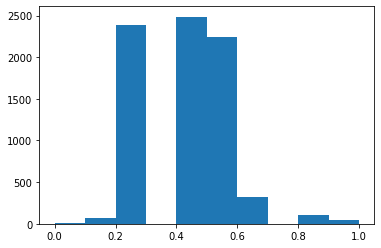

In [ ]:
from matplotlib import pyplot as plt
plt.hist(rounded_normalized_all_rscores)

In [ ]:
irrelv_score= 1-rounded_normalized_all_rscores

In [ ]:
# word2vec_model = []
import gc
gc.collect()

0

# Current Working Model

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
torch.cuda.empty_cache()

mu_div=200.0
smoothen=1e-20
sig=1000.0

def torch_lgamma(a):
  return torch.lgamma(torch.tensor(a))

def torch_gamma(a):
  return torch.exp(torch.lgamma(torch.tensor(a)))

def NewBeta_dist(x,mu,phi_beta,smoothen):
  First = torch_lgamma(phi_beta+smoothen) - (torch_lgamma(phi_beta * mu+smoothen) + torch_lgamma(phi_beta * (1-mu)+smoothen ))
  Second_1 = (mu*phi_beta-1) * torch.log(x+smoothen)
  Second_2 = ( (1-mu)*phi_beta-1 )* torch.log(1-x+smoothen)
  Second = Second_1 + Second_2
  return First + Second

# def NewBeta_dist(x,mu,phi_beta,smoothen):
#   First = torch_gamma(phi_beta) / ( torch_gamma(phi_beta * mu) * torch_gamma(phi_beta * (1-mu)) )
#   Second_1 = torch.pow(x,(mu * phi_beta - 1))
#   Second_2 = torch.pow((1-x),((1-mu)*phi_beta -1))
#   # print(First)
#   # print(Second_1)
#   # print(Second_2)
#   Second = (Second_1+smoothen) * (Second_2+smoothen)
#   return ((First + smoothen) * (Second+smoothen))

def LogL_NewBeta(x,phi_1,relevant_scores):
  x_norm = torch.norm((x-phi_1),dim=-1)
  mu = torch.exp(-0.5 * (torch.pow(x_norm,2))/mu_div)
  # LogL = torch.log(NewBeta_dist(relevant_scores,mu,sig,smoothen)+smoothen)
  LogL = NewBeta_dist(relevant_scores,mu,sig,smoothen)
  return LogL.sum()

def truncate_phi(Xi):
  pi = 3.1415927410125732
  return (1.0/ ((2.0*pi)**0.5) )*torch.exp(-0.5*(Xi**2))

def truncate_bold_phi(x):
  return 0.5 * (1.0 + torch.erf(x / (2.0**0.5)))

def truncate_norm_dist(x,mu,a,b,sig,smoothen):
    check_range = (x >= mu-a) & (x <= mu+b)
    l=(1.0/sig)
    r_numr= truncate_phi((x-mu)/sig)
    r_deno= truncate_bold_phi((b-mu)/sig) - truncate_bold_phi((a-mu)/sig)
    tr_ndist = l*(r_numr/(r_deno+smoothen))
    tr_ndist = tr_ndist*check_range
    return tr_ndist

def LogL_Score_TND(theta,phi,relevant_scores, query_center,x):
  smoothen=1e-20
  a=b=1
  sig=0.01
  x_norm = torch.norm(x,dim=-1)
  mu = torch.exp(-0.5 * (torch.pow(x_norm,2))/100.0)
  LogL = torch.log(truncate_norm_dist(relevant_scores, mu, a,b,sig,smoothen)+smoothen)
  return LogL.sum()

def gaussian(alpha):
    # phi = torch.exp(-5*alpha)
    phi = -0.5*alpha
    return phi

def inverse_multi_quadric(alpha):
    phi = -0.5*torch.log(torch.ones_like(alpha) + alpha)
    return phi

def inverse_quadratic(alpha):
    # phi = torch.ones_like(alpha) / (torch.ones_like(alpha) + alpha)
    phi = -torch.log(torch.ones_like(alpha) + alpha)
    return phi

class PlsvVAE(nn.Module):
    def __init__(self, num_input, en1_units_x, en2_units_x, num_coordinate, num_topic, drop_rate, variance_x, bs, distance="gaussian"):
        super(PlsvVAE, self).__init__()
        self.num_input, self.num_coordinate, self.num_topic, self.variance_x, self.bs\
            = num_input, num_coordinate, num_topic, variance_x, bs

        # encoder
        self.en1_fc     = nn.Linear(num_input, en1_units_x)             # V -> 100 #nxV->(vxh1)->nxh1;
        self.en2_fc     = nn.Linear(en1_units_x, en2_units_x)             # 100  -> 100
        self.en2_drop   = nn.Dropout(drop_rate)
        self.mean_fc    = nn.Linear(en2_units_x, num_coordinate)        # 100  -> 2
        self.mean_bn    = nn.BatchNorm1d(num_coordinate)              # bn for mean
        self.logvar_fc  = nn.Linear(en2_units_x, num_coordinate)        # 100  -> 2
        self.logvar_bn  = nn.BatchNorm1d(num_coordinate)              # bn for logvar


        # RBF
        self.in_features = self.num_coordinate
        self.out_features = self.num_topic
        self.centres = nn.Parameter(torch.Tensor(self.out_features, self.in_features))


        self.query_center_relv = nn.Parameter(torch.zeros(2,1))
        self.query_center_irrelv = nn.Parameter(torch.zeros(2,1))

        if distance=="gaussian":
            self.basis_func = gaussian
        if distance=="inverse_quadratic":
            self.basis_func = inverse_quadratic
        if distance=="inverse_multi_quadric":
            self.basis_func = inverse_multi_quadric
        self.init_parameters()


        # decoder layer
        self.decoder    = nn.Linear(self.num_topic, self.num_input)             # 50   -> 1995
        self.decoder_bn = nn.BatchNorm1d(self.num_topic)                      # bn for decoder

        # decoder document
        self.decoder_phi_bn = nn.BatchNorm1d(num_coordinate)                      # bn for decoder
        self.decoder_x_bn = nn.BatchNorm1d(num_coordinate)

        # prior mean and variance as constant buffers
        prior_mean   = torch.Tensor(1, num_coordinate).fill_(0)
        prior_var    = torch.Tensor(1, num_coordinate).fill_(variance_x)
        self.prior_mean = nn.Parameter(prior_mean, requires_grad=False)
        self.prior_var  = nn.Parameter(prior_var, requires_grad=False)
        self.prior_logvar = nn.Parameter(prior_var.log(), requires_grad=False)


    def init_parameters(self):
        nn.init.normal_(self.centres, 0, 0.01)

    def encode(self, input_):
        N, *_ = input_.size()
        # compute posterior
        en1 = F.softplus(self.en1_fc(input_))                           # en1_fc   output
        en2 = F.softplus(self.en2_fc(en1))                              # encoder2 output
        en2 = self.en2_drop(en2)
        posterior_mean   = self.mean_bn  (self.mean_fc  (en2))          # posterior mean
        posterior_logvar = self.logvar_bn(self.logvar_fc(en2))          # posterior log variance
        posterior_var    = posterior_logvar.exp()

        return en2, posterior_mean, posterior_logvar, posterior_var

    def take_sample(self, input_, posterior_mean, posterior_var, prior_var):
        # take sample
        eps = input_.data.new().resize_as_(posterior_mean.data).normal_(std=1) # noise
        # N x X
        z = posterior_mean + posterior_var.sqrt() * eps                   # reparameterization

        return z

    def decode(self, z):
        # decode
        N, *_ = z.size()
        zx = self.decoder_x_bn(z).view(N, 1, self.num_coordinate) # Nx1xX
        size = (N, self.out_features, self.in_features) # N,K,2
        x = zx.expand(size)
        c = self.decoder_phi_bn(self.centres).unsqueeze(0).expand(size)
        d = (x-c).pow(2).sum(-1)
        distances = self.basis_func(d) #NxK
        zx_phi = torch.exp(distances - torch.logsumexp(distances, dim=-1, keepdim=True))
        recon_v = torch.mm(zx_phi, F.softmax(self.decoder_bn(self.decoder.weight).transpose(1,0), dim=-1))
        return recon_v, zx, zx_phi, d, c

    def forward(self, input_, relevant_scores, compute_loss=False):
        en2, posterior_mean, posterior_logvar, posterior_var = self.encode(input_)
        z = self.take_sample(input_, posterior_mean, posterior_var, self.variance_x)

        # decode
        recon_v, zx, zx_phi,d,c= self.decode(z)

        if compute_loss:
            return recon_v, self.loss(input_, recon_v, zx_phi, posterior_mean, posterior_logvar, posterior_var, d, c, relevant_scores, zx)
        else:
            return z, recon_v, zx, zx_phi


    def loss(self, input_, recon_v, zx_phi, posterior_mean, posterior_logvar, posterior_var, d, c, relevant_scores, zx, avg=True):
        N = posterior_mean.shape[0]
        L = recon_v.shape[0]
        NL = - (input_ * (recon_v+1e-10).log()).sum(-1)

#         N1, *_ = z.size()
#         size = (N1, self.out_features, self.in_features)
#         c = self.decoder_phi_bn(self.centres).unsqueeze(0).expand(size)

        prior_mean   = self.prior_mean.expand_as(posterior_mean)
        prior_var    = self.prior_var.expand_as(posterior_mean)
        prior_logvar = self.prior_logvar.expand_as(posterior_mean)

        var_division    = posterior_var  / prior_var #Nx2
        diff            = posterior_mean - prior_mean
        diff_term       = diff * diff / prior_var
        logvar_division = prior_logvar - posterior_logvar

        xKLD = 0.5 * ( (var_division + diff_term + logvar_division).sum(-1) - self.num_coordinate)
        return_xKLD = xKLD.mean(0)
        KL = return_xKLD

        # NegativeLogL_RScore = - LogL_Score_beta(zx_phi,self.decoder_phi_bn(self.centres),relevant_scores)
        # NegativeLogL_RScore = - LogL_Score(zx,relevant_scores)
        # x_norm = torch.norm(zx,dim=-1)
        # NegativeLogL_RScore = (100000 * (torch.exp(-0.5 * (torch.pow(x_norm,2)/10.0) - relevant_scores )  )**2  ).sum()
        # NegativeLogL_RScore = LogL_Score_test(zx,relevant_scores)

        # NegativeLogL_RScore = - LogL_Score_TND(zx_phi,self.decoder_phi_bn(self.centres),relevant_scores, self.query_center,zx)
        NL_mean = NL.mean()
        # NegativeLogL_RScore = - LogL_NewBeta(zx,relevant_scores)
        phi_1 = torch.narrow(c,1,0,1)
        NegativeLogL_RScore = - LogL_NewBeta(zx, phi_1, relevant_scores)
        loss = NL_mean + KL + NegativeLogL_RScore/N

        # print(type(loss))
        return loss, NL_mean, return_xKLD,  KL, NegativeLogL_RScore/N

In [ ]:
model = PlsvVAE(num_input, en1_units_x, en2_units_x, num_coordinate, num_topic, drop_rate, variance_x, bs, "inverse_quadratic")
model.to(device)
optimizer = optim.Adam(model.parameters(), learning_rate, betas=(beta1, beta2))
epochs = 1000
phi_arr = []
beta_arr = []
x_arr = []
recon_arr = []
neg_log_rscore_arr=[]
list_d = []

all_indices = torch.randperm(tensor_train_w.size(0)).split(bs)

for epoch in range(epochs):
    loss_u_epoch = 0.0
    loss_xkl_epoch = 0.0
    loss_betakl_epoch = 0.0
    loss_phikl_epoch = 0.0
    loss_KLD = 0.0
    loss_phi_epoch = 0.0
    recon_ep = 0.0
    loss_epoch = 0.0
    neg_log_rscore_ep = 0.0
    model.train()
    d_temp = []
    count = 0

    for batch_ndx in all_indices:

        input_w = tensor_train_w[batch_ndx].to(device)
        labels = train_label[batch_ndx]
        #relevant_scores = all_rscores[batch_ndx].to(device).unsqueeze(-1)
        #relevant_scores = normalized_all_rscores[batch_ndx].to(device).unsqueeze(-1)
        # relevant_scores = rounded_normalized_all_rscores[batch_ndx].to(device).unsqueeze(-1)
        scores = irrelv_score[batch_ndx].to(device).unsqueeze(-1)

        recon_v, (loss, loss_u, xkl_loss, kl, neg_log_rscore) = model(input_w, scores, compute_loss=True)

        optimizer.zero_grad()
        loss.backward()

        optimizer.step()             # backpror.step()            # update parameters
        loss_epoch += loss.item()
        loss_u_epoch += loss_u.item()
        loss_xkl_epoch += xkl_loss.item()
        loss_KLD += kl.item() #/ len(tensor_train_w))
        recon_ep += recon_v.mean().item()
        neg_log_rscore_ep += neg_log_rscore.item()
        count = count + 1;
    x_arr.append(loss_xkl_epoch)
    recon_arr.append(loss_u_epoch)
    neg_log_rscore_arr.append(neg_log_rscore_ep)

    if epoch % 10 == 0:
        print('Epoch {}, loss={}'.format(epoch, loss_epoch))
        print('x_loss={}, recon_loss={}, KLD= {}, neg_loss = {}'.format(loss_xkl_epoch, loss_u_epoch, loss_KLD,neg_log_rscore_ep))

In [ ]:
import plotly.graph_objects as go
def plot_loss(y,name):
  figure = go.Figure()
  figure.add_trace(go.Scatter(x=[i for i in range(1,epochs+1)], y=y,mode='lines',name=name))
  figure.show(renderer='colab')

In [ ]:
plot_loss(recon_arr,"Recon")

In [ ]:
plot_loss(neg_log_rscore_arr,"neg")

In [ ]:
#  torch.save(model.state_dict(),'Foto_beta_t20_a100_div500_e20_20news_reuters.t7')

In [ ]:
# ## Loading a Saved Model
# model = PlsvVAE(num_input, en1_units_x, en2_units_x, num_coordinate, num_topic, drop_rate, variance_x, bs, "inverse_quadratic")
# model.to(device)
# all_indices = torch.randperm(tensor_train_w.size(0)).split(bs)
# model.load_state_dict(torch.load('Foto_beta_t50_a100_div500_e20_20news_reuters.t7'))

In [ ]:
def get_topwords(beta, id_vocab):
    topic_indx = 0
    topwords_topic = []
    for i in range(len(beta)):
        topwords_topic.append( str(topic_indx)+": "+ " ".join([id_vocab[j] for j in beta[i].argsort()[:-10 - 1:-1]]))
        topic_indx+=1
    return topwords_topic

In [ ]:
model.eval()
x_list = []
phi_list = []
beta_list = []
labels_list = []
doc_ids = []
zx_phi_list=[]

with torch.no_grad():
    for batch_ndx in all_indices:
        input_w = tensor_train_w[batch_ndx].to(device)
        labels = train_label[batch_ndx]

        # relevant_scores = all_rscores[batch_ndx].to(device).unsqueeze(-1)
        # relevant_scores = rounded_normalized_all_rscores[batch_ndx].to(device).unsqueeze(-1)
        relevant_scores = irrelv_score[batch_ndx].to(device).unsqueeze(-1)

        labels_list.extend(labels)
        z, recon_v, zx, zx_phi = model(input_w, relevant_scores, compute_loss=False)
        zx = zx.view(-1, num_coordinate).data.detach().cpu().numpy()
        zx_phi = zx_phi.view(-1, num_topic).data.detach().cpu().numpy()
        zx_phi_list.extend(zx_phi)
        x_list.extend(zx)
        doc_ids.extend(batch_ndx)

    x_list = np.array(x_list)
    # zx_phi_list =  np.array(zx_phi_list)

    beta = model.decoder.weight.data.cpu().numpy().T#
    zphi = model.decoder_phi_bn(model.centres).data.cpu().numpy()
    # query_center = model.query_center.data.cpu().numpy()
    print("---"*10)
    topword_topics = get_topwords(beta, id_vocab)
    topword_topics_list=[]
    for topwords in topword_topics:
        topword_topics_list.append(topwords.split())
        print(topwords)
    print("---"*10)

------------------------------
0: dlrs said year mln company share quarter billion earnings first
1: ct april record march pay prior may div qtly dividend
2: said company would share offer stock analyst group takeover merger
3: oil said price opec bpd saudi barrel crude production official
4: said dlrs bank company corp acquisition first federal financial saving
5: billion year pct said dlrs february january mln trade export
6: said exchange dollar market would currency foreign economic policy rate
7: stock dividend split said share record april payable declared two
8: stg interest plc operating making ltd company share pretax cent
9: share said offer dlrs pct company inc tender corp stock
10: said oil pct company price would ltd canada new canadian
11: net profit mln rev ct inc avg shrs mths note
12: share said stock pct company common dlrs inc stake group
13: mln billion profit tax year sale group company net income
14: said inc corp unit company sale sell co acquisition term
15: tra

In [ ]:
def get_Z(X,Y):
  norms = torch.zeros(X.shape)
  Z = torch.zeros(X.shape)

  for i in range(X.shape[0]):
    for j in range(X.shape[0]):
      v = torch.tensor([X[i][j],Y[i][j]])
      norms[i][j] = torch.norm(v)
      Z[i][j]=torch.exp(-0.5 * (torch.pow(norms[i][j],2))/mu_div)
  return Z

In [ ]:
def get_Contour(ax,x_list):
  xlist = np.linspace(-50, 50, 200)
  ylist = np.linspace(-50, 50, 200)
  X, Y = np.meshgrid(xlist, ylist)
  Z = get_Z(X,Y)
  levels = np.arange(0,1,0.1)
  cp = ax.contour(X, Y, Z, levels=levels)
  ax.clabel(cp, inline=1, fontsize=10)

In [ ]:
import collections
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot, show
import seaborn as sb

def plot_fig(zx, labels_list, zphi, query_center):
    labels = []
    for i in range(len(labels_list)):
        labels.append('C'+str(labels_list[i]))
    fig, ax = plt.subplots( figsize=(20, 20))
    # get_Contour(ax,zx)

    sb.scatterplot(ax=ax,x=zx[:,0],y=zx[:,1],hue=labels_list,alpha=0.8,palette='deep')
    ax.set(ylim=(-50,50))
    ax.set(xlim=(-50,50))


    # ax.scatter(zx[:,0], zx[:,1], alpha=0.8, c=labels, facecolors='none', s=8)
    # for d in range(len(labels_list)):
    #  score = rounded_normalized_all_rscores[doc_ids[d]].item()
    #  if(score>0.7 and score<0.9):
    #   ax.text(zx[d,0],zx[d,1], str(round(score, 3) ) )

    ax.text(query_center[0],query_center[1], 'X' ,c='black')
    # ax.text(0,0, 'X' ,c='black')
    ax.scatter(zphi[:, 0], zphi[:, 1], alpha=1.0,  edgecolors='black', facecolors='none', s=30)

    for indx, topic in enumerate(zphi):
        ax.text(zphi[indx, 0], zphi[indx, 1], 'topic'+str(indx))

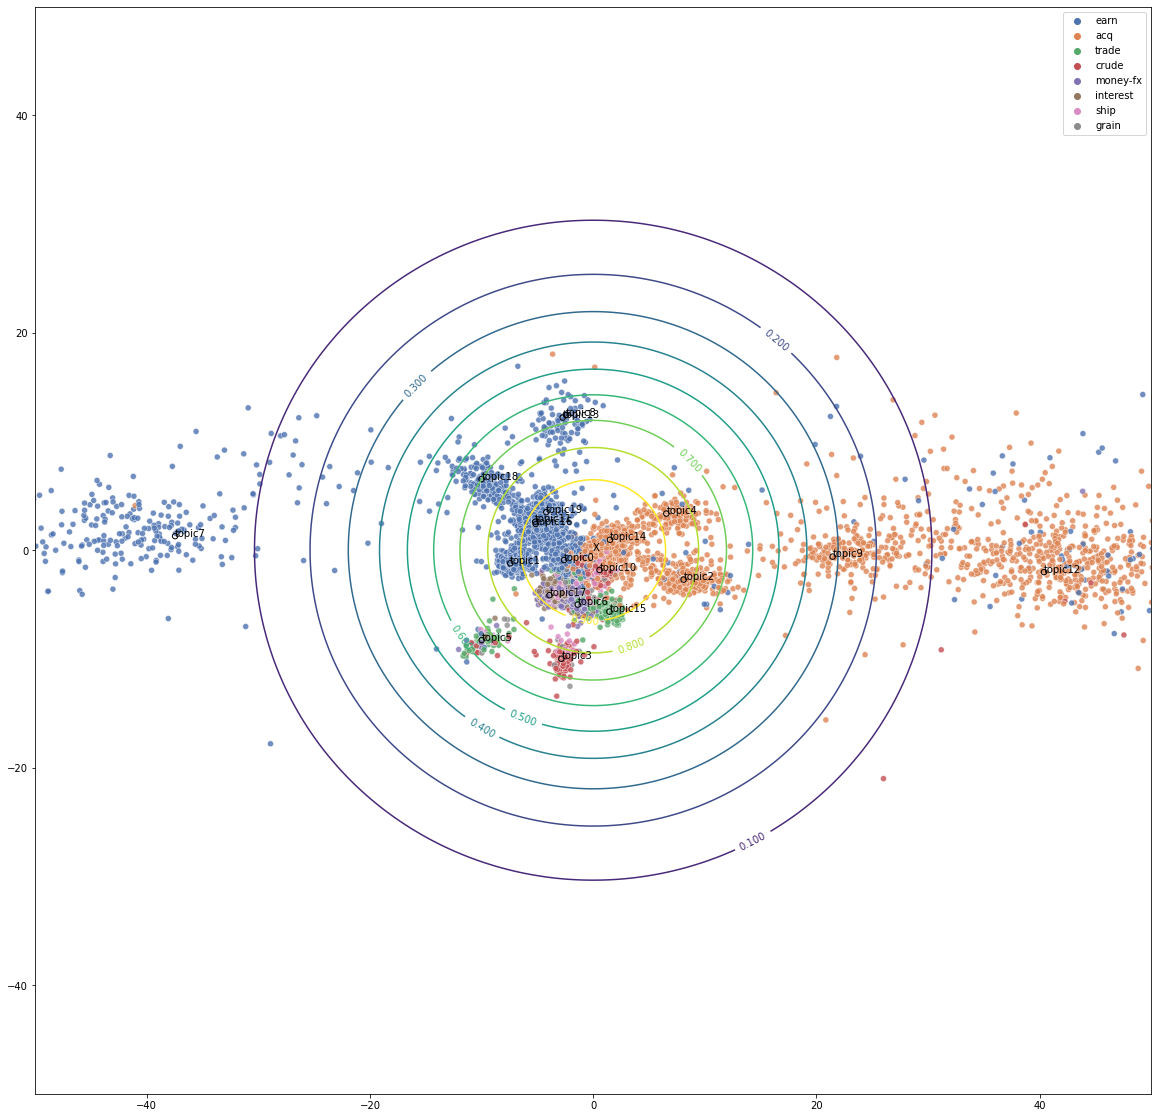

In [ ]:
plot_fig(x_list, labels_list, zphi,query_center=[0.0,0.0])

In [ ]:
------------------------------
0: will wa ha people year government time key system money
1: game wa team year will pt player ha play win
2: window file program system will problem help software version doe
3: wa car bike time ha will engine well good thing
4: wa god christian church people jesus book will ha word
5: space art mission 1st launch satellite center will wolverine appears
6: armenian wa turkish people greek turkey russian turk university muslim
7: key will message chip number bit list de algorithm system
8: wa president going people well ha myers time will told
9: ha patient wa disease food doctor treatment study cancer medical
10: will good email power ha book point price sale current
11: image file jpeg program entry format data version package gif
12: god wa will jesus lord christ father son man ha
13: wa israel state israeli jew arab ha people war will
14: drive card system ha problem disk will work hard mac
15: wa gun people law state government will weapon ha crime
16: people god wa doe ha thing belief question argument will
17: game wa team player year hockey play season ha baseball
18: db water dept privacy system internet will encryption technology computer
19: file widget server application set program version window sun will
------------------------------



#WordCloud



In [ ]:
!pip install wordcloud

In [ ]:
word_list=data_20news_preprocessed[j].split()
print(word_list)
flatten_all_words

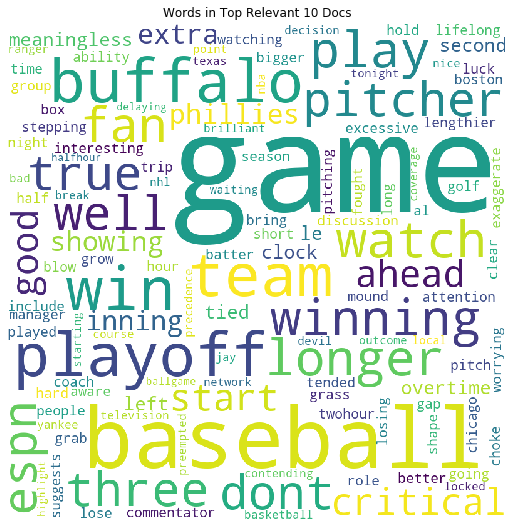

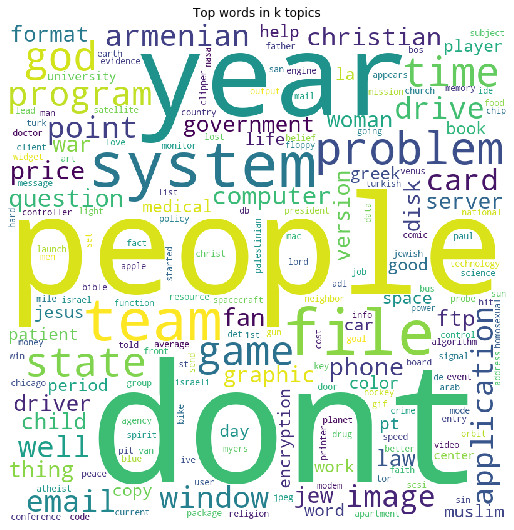

In [ ]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
from matplotlib import pyplot as plt

comment_words = ''
topic_topword_comment = ''

for val in top_10_docs:
    comment_words += " ".join(val)+" "

for topword_topic in topword_topics_list:
    topic_topword_comment += " ".join(topword_topic)+" "

wordcloud_top10_docs = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

wordcloud_topword_topics = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(topic_topword_comment)

f = plt.figure(1,figsize = (8, 8))
plt.title('Words in Top Relevant 10 Docs')
plt.axis("off")
plt.tight_layout(pad = 3.0)
plt.imshow(wordcloud_top10_docs)
g = plt.figure(2,figsize = (8, 8))
plt.title("Top Words in k topics")
plt.axis("off")
plt.tight_layout(pad = 3.0)
plt.imshow(wordcloud_topword_topics)
plt.show()

#Archive

In [ ]:
plt.hist(x=all_rscores.data)


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_all_rscores = scaler.fit_transform(all_rscores.data.reshape(-1,1))
normalized_all_rscores

In [ ]:
plt.hist(x=normalized_all_rscores)
# print(normalized_all_rscores)
np.max(normalized_all_rscores.flatten())

In [ ]:
all_words_in_docs=[]

def doc_to_words(doc):
  word_list=[]
  for i in doc:
    words = i.split()
    word_list.append([w for w in words])
  return word_list
all_words_in_docs = doc_to_words(data_20news_preprocessed)

In [ ]:
# with open('neg_log_rscore_arr.txt', 'w') as filehandle:
#     for listitem in neg_log_rscore_arr:
#         filehandle.write('%s\n' % listitem)

In [ ]:
# data_20news_preprocessed = []
# data_20news_preprocessed_labels = []
# for i in range(len(data_20news.data)):
#   doc = preprocessing_nonstem(data_20news.data[i],word2vec_model)
#   if(doc!=''):
#     data_20news_preprocessed.append(doc)
#     data_20news_preprocessed_labels.append(targets_20news[i])

In [ ]:
# data_20news_embedded = []
# for word in all_words_in_docs:
#   for w in word:
#     try:
#       type(word2vec_model[w])=='numpy.ndarray'
#     except KeyError:
#       word.remove(w)
#   data_20news_embedded.append(' '.join(word))
# # data_20news_embedded

In [ ]:
# max = 0
# j = 0
# for i,v in enumerate(all_rscores):
#   if(v>max):
#     max,j = v,i
# print(j,max,data_20news_preprocessed[j])

In [ ]:
def flatten_list(user_list):
  return [item for sublist in user_list for item in sublist]
flatten_all_words = flatten_list(all_words_in_docs)
# flatten_embedded = flatten_list(data_20news_embedded)
# flatten_embedded

In [ ]:
# count=0
# embeddings = {}

# for f in flatten_all_words:
#   try :
#      embeddings[f] = word2vec_model[f]
#   except KeyError:
#     count = count+1
#     # print(f)
# print( count / len(flatten_all_words)*100)
# # len(flatten) - count

# keywords = ['illness','disease','fatal','diagnosis']
# for k in keywords:
#   embeddings[k] = word2vec_model[k]
# embeddings

In [ ]:
# def cosine_similarity_desm_np(query_list,doc,embeddings):
#   doc_bar = np.zeros(300)
#   for d in doc:
#     doc_bar = doc_bar + embeddings[d] / np.linalg.norm(embeddings[d])
#   doc_bar = doc_bar / len(doc)
#   sim = []
#   for i in query_list:
#     sim.append(np.dot(word2vec_model[i],doc_bar) / (np.linalg.norm(word2vec_model[i])*np.linalg.norm(doc_bar)) )
#   return doc_bar,sim

In [ ]:
# def cosine_similarity_desm(query_list,doc,embeddings):
#   doc_bar = torch.zeros(300)
#   for d in doc:
#     doc_bar.add_(torch.from_numpy(embeddings[d])) / torch.norm(torch.from_numpy(embeddings[d]),p='fro')
#   doc_bar = doc_bar / len(doc)

#   sim_list = []
#   sim=torch.zeros(1)

#   current=0
#   for q in query_list:
#     sim_list.append(torch.dot(torch.from_numpy(word2vec_model[q]) , doc_bar) / (torch.mul(torch.norm(torch.from_numpy(word2vec_model[q])),torch.norm(doc_bar))))
#     sim.add_(sim_list[current])
#     sim_return = sim / len(sim)
#     current=current+1
#   return sim_return

In [ ]:
import plotly.graph_objects as go
epochs=1000
def plot_loss(y,name):
  figure = go.Figure()
  figure.add_trace(go.Scatter(x=[i for i in range(1,epochs+1)], y=y,mode='lines',name=name))
  figure.show(renderer='colab')

plot_loss(x_arr,'KLD')
plot_loss(recon_arr,'Recon_loss')
plot_loss(neg_log_rscore_arr,'RScore')

> Keyword search in corpus: Returns docs with matching keywords


In [ ]:
matching = [s for s in data_20news_preprocessed if " sport " in s]


  > # Google Pre-trained Model & Word2Vec



In [ ]:
# !wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

In [ ]:
# start=time()
# !gunzip GoogleNews-vectors-negative300.bin.gz
# print('Cell took %.2f seconds to run.' % (time() - start))

In [ ]:
# !zip embeddings.zip /content/embeddings.csv
# !wget -c "https://www.dropbox.com/s/bgtlhwclz0soy4e/embeddings.zip"

In [ ]:
from gensim import models
word2vec_model = models.KeyedVectors.load_word2vec_format(
    'C:/Users/sanuj/Documents/FoTo/GoogleNews-vectors-negative300.bin/GoogleNews-vectors-negative300.bin', binary=True)
# print('Cell took %.2f seconds to run.' % (time() - start))

C:\Users\sanuj\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
## loading original document
from sklearn.datasets import fetch_20newsgroups
data_20news=fetch_20newsgroups(subset='all',remove=('headers', 'footers', 'quotes'))

In [ ]:
data_20news.target_names

In [ ]:
data_20news.target

array([10,  3, 17, ...,  3,  1,  7])

In [ ]:
data_20news_fetch = []
for i in range(len(data_20news.data)):
  doc = preprocessing_nonstem(data_20news.data[i],word2vec_model)
  if(doc!=''):
    data_20news_fetch.append(doc)

In [ ]:
save_obj(data_20news_fetch,'data_20News_preprocessed_new')

In [ ]:
len(data_20news_fetch)

18283

In [ ]:
!dir